<a href="https://colab.research.google.com/github/IshanBhanuka/FYP-DeepLearningmodel-for-PM2.5/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('/content/drive/MyDrive/EE405 Undergraduate Project I_Group 11/E18324/Data/new_outliers/Galle.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
#data.index = pd.DatetimeIndex(data.index.values, freq='H')
Length=len(data)
data = data.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)
data

,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-03-29 12:00:00,8.00,35.40,61.75,12.0,29.0,2.0,3.0
2023-03-29 13:00:00,8.00,34.72,63.00,13.0,29.0,2.0,3.0
2023-03-29 14:00:00,7.00,34.17,65.00,14.0,29.0,2.0,3.0
2023-03-29 15:00:00,6.75,34.40,64.50,15.0,29.0,2.0,3.0
2023-03-29 16:00:00,7.75,34.75,62.50,16.0,29.0,2.0,3.0
...,...,...,...,...,...,...,...
2023-12-22 09:00:00,11.00,32.30,58.50,9.0,22.0,4.0,12.0
2023-12-22 10:00:00,26.75,33.02,56.75,10.0,22.0,4.0,12.0
2023-12-22 11:00:00,10.00,32.92,59.25,11.0,22.0,4.0,12.0


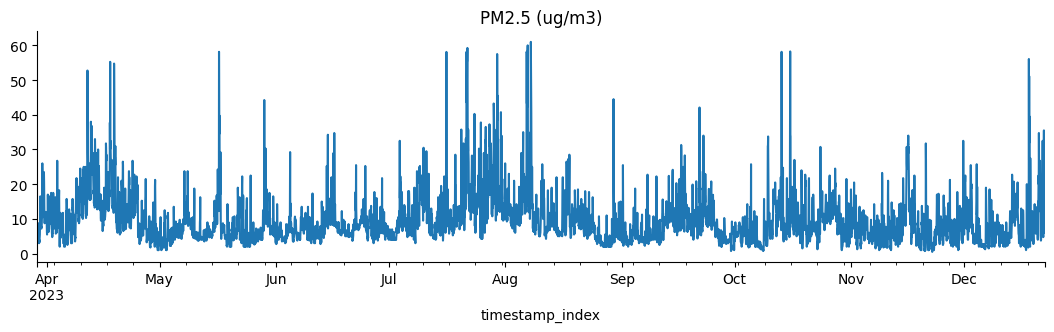

In [25]:
from matplotlib import pyplot as plt
data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [43]:
# Splitting data into train and test sets
train_data = data.iloc[:int(Length*0.8)]
#val_data = data.iloc[int(Length*0.6):int(Length*0.8)]
test_data = data.iloc[int(Length*0.8):]
test_data
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-10-29 23:00:00,6.50,28.95,78.50,23.0,29.0,6.0,10.0
2023-10-30 00:00:00,5.25,28.70,78.75,0.0,30.0,0.0,10.0
2023-10-30 01:00:00,3.50,28.00,80.50,1.0,30.0,0.0,10.0
2023-10-30 02:00:00,3.50,27.90,80.25,2.0,30.0,0.0,10.0
2023-10-30 03:00:00,4.25,27.60,80.75,3.0,30.0,0.0,10.0
...,...,...,...,...,...,...,...
2023-12-22 09:00:00,11.00,32.30,58.50,9.0,22.0,4.0,12.0
2023-12-22 10:00:00,26.75,33.02,56.75,10.0,22.0,4.0,12.0
2023-12-22 11:00:00,10.00,32.92,59.25,11.0,22.0,4.0,12.0


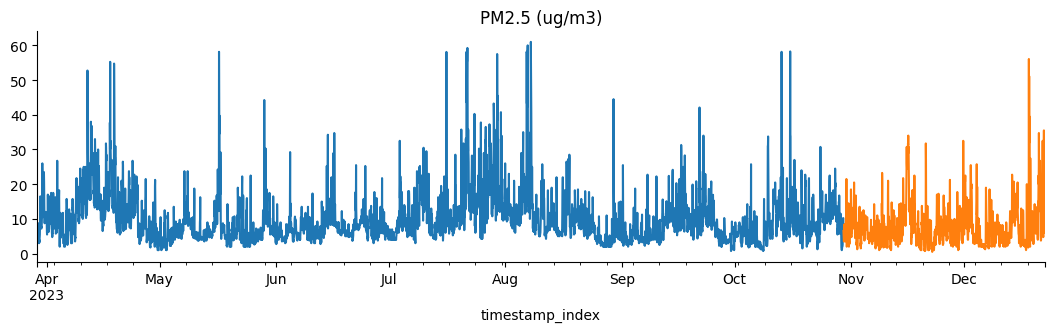

In [44]:
train_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
#val_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
test_data['PM2.5 (ug/m3)'].plot(kind='line', figsize=(13,3), title='PM2.5 (ug/m3)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_data.drop(columns=['PM2.5 (ug/m3)'])  # Features
y_train = train_data['PM2.5 (ug/m3)']  # Target variable

# Instantiate the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming your test data is stored in DataFrame test_data with features and actual PM2.5 values
X_test = test_data.drop(columns=['PM2.5 (ug/m3)'])  # Features
y_test = test_data['PM2.5 (ug/m3)']  # Actual PM2.5 values

# Make predictions using the trained model
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4.648529992229992
Mean Squared Error (MSE): 38.6519795103885
Root Mean Squared Error (RMSE): 6.217071618566775


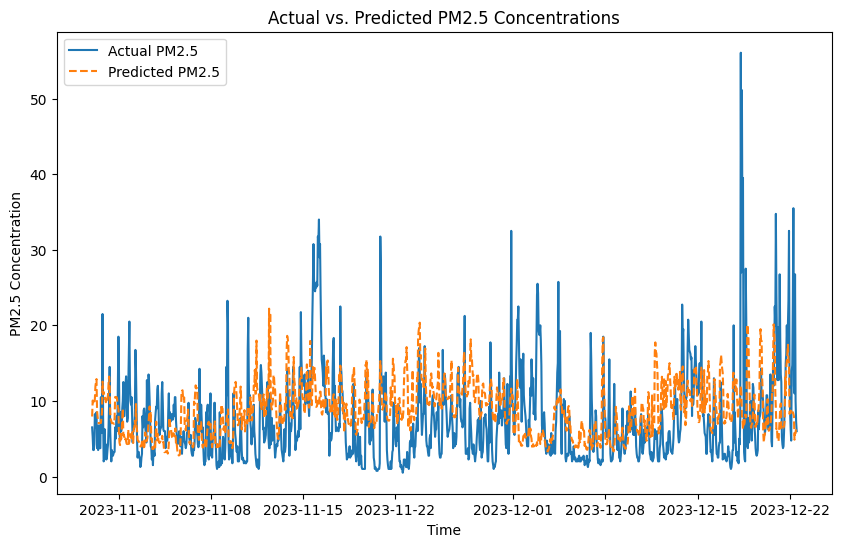

In [51]:
pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted PM2.5'])

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual PM2.5')
plt.plot(pred_df, label='Predicted PM2.5', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('Actual vs. Predicted PM2.5 Concentrations')
plt.legend()
plt.show()
